<a href="https://colab.research.google.com/github/Rodrigo-O-Santos/Portfolio/blob/master/Viol%C3%AAncia_no_Rio_de_Janeirob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RIO DE JANEIRO: "território da beleza e do caos"

Quando ouvimos o nome desta cidade, podemos ter duas linhas de pensamento. Uma delas é, sem dúvida, lembrar das belas paisagens e eventos turísticos mundialmente famosos. Com suas praias eternizadas pelo calçadão de Copacabana, o Cristo Redentor que foi eleito uma das 7 maravilhas do mundo moderno ou, o Carnaval que é um evento que atrai milhões de turístas por ano. O Rio de Janeiro de fato, é uma cidade maravilhosa.

Porém, não podemos negar que todo este encanto é acompanhado por um sério problema: a violência. Não é raro o Rio de Janeiro estampar capa de jornais com mortes violentas, assalto a ônibus ou chacinas. Assaltos à mão armada, sequestros relâmpagos e tiroteios constantes fazem da cidade um "Purgatório da beleza e do caos" como diz a música de Fernanda Abreu: Rio 40 graus.

Sabemos que todo o Brasil sofre com a violência, mas é importante levar em consideração as peculiaridades do Rio de Janeiro com seus morros dominados pelo tráfico de drogas e que estão em todo lugar, até mesmo na zona sul, um dos lugares mais caros para viver na capital do Estado.
Neste sentido é importante analisar os dados desta violência para entendermos o contexto em busca de políticas públicas para ações efetivas dentro deste cenário. 

<center><img src="https://bit.ly/2Bp1u3r", heigh = "20px"></center>

# Analisando a Violência no Rio de Janeiro

Iremos analisar neste *notebook*, os dados da violência no Rio de Janeiro através dos dados disponibilizados pelo governo do estado. 

Procuraremos entender:
- Quais tipos de violência são mais frequentes;

- Quais correlações podemos verificar entre os crimes e o período em que foram cometidos;

- Verificar quais outros *insights* podem ser extraídos.

Vale lembrar que este é um estudo preliminar que deve ser associado a outros estudos para aprofundamento do entendimento da violência no Rio de Janeiro.

## Obtenção dos Dados
Os dados obtidos para esta análise foram extraídos do site do [Governo do Estado](http://www.ispdados.rj.gov.br/estatistica.html).

Dentre os arquivos disponibilizados no portal, iremos utilizar o arquivo `csv` que se encontra no endereço abaixo:
https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv


In [ ]:
# Importando pacotes necessários para análise
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pylab
from pylab import *

In [ ]:
# Importando o arquivo para análise
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv")

## Análise inicial dos dados

Com os dados extraídos abaixo, podemos ver que se trata de um DataFrame relativamente pequeno, com apenas 344 linhas e 56 colunas, com dados que iniciam em janeiro/1991 e vão até agosto/2019.

É possível verificar que há muitos valores ausentes, chegando a 80% nos crimes de roubo e furto de bicicletas. Considerando que a ausência de dados é maioria ampla e que não se trata dos crimes mais violentos, não irei analisar estes dados neste momento. Consequentemente, também não irei tratar estes dados.

In [ ]:
# Verificando as 5 primeiras e as 5 últimas entradas do DataSet
df

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2


In [ ]:
# Verificando o tamanho do meu Dataset
df.shape

(344, 56)

In [ ]:
# Verificando os anos presentes no conjunto de dados
df.vano.unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [ ]:
# Verificando o número de linhas e colunas que temos em nosso dataset para análise
print("Linhas:\t {}".format(df.shape[0]))
print("Colunas: {}".format(df.shape[1]))

Linhas:	 344
Colunas: 56


In [ ]:
# Vamos ver o nome das colunas inseridas em nosso dataset
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [ ]:
# Vamos verificar quais os tipos de dado existem em cada coluna
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [ ]:
# Identificando a porcentagem de valores ausentes em cada coluna
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

## Informações estatística da violência no Rio de Janeiro

Os cinco tipos de violência mais frequentes são:

1. Lesão corporal dolosa: 1.889.523
2. Roubo de rua: 1.628.750
3. Ameaça: 1.371.521
4. Roubo a transeunte: 1.175.971
5. Lesão corporal culposa: 845.869

Percebam que **ameça** e **lesão corporal culposa** figuram entre os crimes mais cometidos mesmo sem dados registrados entre 1991 e 1998. Também não preenchi este dados, pois como vamos ver, os crimes tendem a aumentar com o passar dos anos, sendo assim, preencher com a média ou mediana poderia insuflar estes dados não correspondendo à realidade.

Mas outros tipos de crimes também chamam atenção, como podemos ver com as análises abaixo.

Podemos verificar que o número de furtos foi ligeiramente maior que o de roubos, representando 52,5% entre os dois tipos:

> Total de furtos: 3.589.013

> Total de roubos: 3.243.273

Podemos perceber que a média de roubo de veículo por ano (1991 a agosto/2019) foi maior que a de furto, com uma taxa de recuperação de veículos em torno de 43%.

> Média do roubo de veículos por ano no RJ:	 2448.70

> Média do furto de veículos por ano no RJ:	 1674.67

> Média de veículos recuperados no RJ:		 1772.24


Já no que tange aos homícidios, podemos perceber que a média do tipo doloso é mais que o dobro do culposo.

> Média de homícidio culposo:	 209.89

> Média de homícidio doloso:	 504.56


Analisando ainda os números referente a lesão corporal, podemos perceber que o modo doloso do crime representa 69% entre os dois tipos de lesão corporal.

> Lesão corporal culposa: 845.869

> Lesão corporal dolosa: 1.889.523

Com estas análises prévias podemos perceber que estes tipos de crimes no RJ são cometidos, em maior número, de forma premeditada.


**Observações:**

`furto` = subtração de algo móvel pertencente a outra pessoa;

`roubo` = subtração de algo móvel pertencente a outra pessoa com ameaça ou uso da violência;

`culposo` = sem a intenção, por negligência, imprudência ou imperícia;

`doloso` = com intenção, há premeditação.

In [ ]:
# Visualizando o resumo estatístico do DataFrame
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

In [ ]:
# Verificando qual tipo de crime foi mais praticado
df.sum().sort_values(ascending = False)[:15]

registro_ocorrencias    13340952.0
total_furtos             3589013.0
total_roubos             3243273.0
outros_furtos            2062049.0
lesao_corp_dolosa        1889523.0
indicador_roubo_rua      1628750.0
ameaca                   1371521.0
roubo_transeunte         1175971.0
lesao_corp_culposa        845869.0
indicador_roubo_veic      842352.0
roubo_veiculo             842352.0
vano                      689664.0
recuperacao_veiculos      609650.0
furto_veiculos            576087.0
furto_transeunte          522509.0
dtype: float64

In [ ]:
# Verificando onde estão os dados ausentes em ameaça
df.groupby(['vano']).ameaca.mean().sort_values(ascending = False)

vano
2014    7283.250000
2013    6974.083333
2012    6936.500000
2011    6772.750000
2010    6363.416667
2015    6244.333333
2009    5936.833333
2003    5789.333333
2002    5519.250000
2004    5445.250000
2005    5410.083333
2008    5404.416667
2016    5404.000000
2007    5217.166667
2006    5150.000000
2019    5074.000000
2001    4843.583333
2018    4667.416667
2017    4252.916667
2000    4101.333333
1999    3194.833333
1991            NaN
1992            NaN
1993            NaN
1994            NaN
1995            NaN
1996            NaN
1997            NaN
1998            NaN
Name: ameaca, dtype: float64

In [ ]:
# Verificando onde estão os dados ausentes em lesão corporal culposa
df.groupby(['vano']).lesao_corp_culposa.mean().sort_values(ascending = False)

vano
2000    5816.416667
2012    3962.916667
2013    3926.333333
2011    3894.500000
2014    3883.250000
2002    3610.083333
2010    3570.416667
2001    3558.083333
2009    3435.583333
2008    3404.083333
2015    3364.250000
2004    3346.083333
2003    3278.916667
2007    3278.583333
1999    3214.250000
2005    3034.000000
2006    2943.333333
2016    2912.500000
2018    2293.333333
2019    2284.250000
2017    2239.333333
1991            NaN
1992            NaN
1993            NaN
1994            NaN
1995            NaN
1996            NaN
1997            NaN
1998            NaN
Name: lesao_corp_culposa, dtype: float64

In [ ]:
# Visualizando as médias das colunas: roubo_veículo, furto_veículo, recuperacao_veiculos
print("Média do roubo de veículos por ano no RJ:\t {:.2f}".format(df.roubo_veiculo.mean()))
print("Média do furto de veículos por ano no RJ:\t {:.2f}".format(df.furto_veiculos.mean()))
print("Média de veículos recuperados no RJ:\t\t {:.2f}".format(df.recuperacao_veiculos.mean()))

Média do roubo de veículos por ano no RJ:	 2448.70
Média do furto de veículos por ano no RJ:	 1674.67
Média de veículos recuperados no RJ:		 1772.24


In [ ]:
# Verificando o quanto maior, em termos percentuais, é o roubo em relação ao furto
print("Quantos por cento `roubo de veículo` é maior que `furto de veículo`:\t {:.2f}".format(df.roubo_veiculo.mean() / df.furto_veiculos.mean()))

Quantos por cento `roubo de veículo` é maior que `furto de veículo`:	 1.46


In [ ]:
# Calculando percentual de carros recuperados em relação aos carros roubados e furtados
print("Percentual de carros recuperados no RJ:\t {:.2f}".format(df.recuperacao_veiculos.mean() / (df.furto_veiculos.mean() + df.roubo_veiculo.mean())))

Percentual de carros recuperados no RJ:	 0.43


#### **Análise dos homícidios**

Para comparar as taxas de homícidio culposo, irei primeiro preencher os valores ausentes com a mediana anual, já que aproxidamente 24% dos dados estão ausentes em nosso conjunto de dados. 

Podemos verificar que o crime de homícidio doloso, no ano com menor registro, foi cometido 272 vezes, o que nos mostra que a cada 4 dias, apenas 1 não houve a prática deste tipo de crime. No ano com mais casos deste crime temos uma incrível marca de 831 casos, ou seja, 2.3 homícidios por dia.

O homícidio culposo, chega a números que representam a metade do tipo doloso. Comparando os dois tipos de homícidio considerando a média anual, temos:

homícidio doloso: 1.4 por dia;

homícidio culposo: 0.58 por dia. 


In [ ]:
# Preencher valores ausentes em `hom_culposo` com a mediana
hom_culposo_median = df.hom_culposo.median()
df.hom_culposo.fillna(hom_culposo_median, inplace = True)

# Ver valores ausentes
df.hom_culposo.isnull().sum()

0

In [ ]:
# Verificar os valores máximo e mínimo do crime de homícidio doloso
print("Valor máximo de homícidio doloso:\t {}".format(df.hom_doloso.max()))
print("Valor mínimo de homícidio doloso:\t {}".format(df.hom_doloso.min()))

Valor máximo de homícidio doloso:	 831
Valor mínimo de homícidio doloso:	 272


In [ ]:
# Verificar os valores máximo e mínimo do crime de homícidio culposo
print("Valor máximo de homícidio culposo:\t {:.0f}".format(df.hom_culposo.max()))
print("Valor mínimo de homícidio culposo:\t {:.0f}".format(df.hom_culposo.min()))

Valor máximo de homícidio culposo:	 449
Valor mínimo de homícidio culposo:	 111


In [ ]:
# Ver a média anual de homícidio culposo e doloso
print("Média de homícidio culposo:\t {:.2f}".format(df.hom_culposo.mean()))
print("Média de homícidio doloso:\t {:.2f}".format(df.hom_doloso.mean()))

Média de homícidio culposo:	 209.89
Média de homícidio doloso:	 504.56


## Visualização de dados

### Média anual dos 5 crimes mais cometidos

Podemos observar que dos 5 crimes mais cometidos, apenas `lesão corporal culposa` se manteve relativamente estável desde que começou a ser registrado em 1999.

Todos os outros mostram tendência ao crescimento a partir de 1994 (ver linha vertical em vermelho no gráfico abaixo), com destaque para `roubo de rua` e `roubo a transeunte`. Vale observar aqui que a correlação positiva entre estas duas variáveis é esperada uma vez que, o roubo a transeunte faz parte de um grupo maior: roubo de rua que contempla além deste os crimes de roubo de celular e roubo. Observem ainda que, ambas as linhas seguem a mesma tendência, no mesmo período, sendo praticamente uma réplica. Isto mostra o quanto este crime é superior aos demais influenciando diretamente a curva de roubo de rua.

Não achei nenhum evento significativo no estado do RJ ou Brasil que justifique este crescimento nos crimes, o que me leva a acreditar que houve, a partir deste ano, um maior controle dos eventos ou implantação de melhor metodologia para registro dos crimes cometidos.

Isto se justifica ao observarmos que, apenas em 1999, os crimes de `ameaça` e `lesão corporal culposa` começaram a ser registrados (ver linha vertical azul no gráfico).

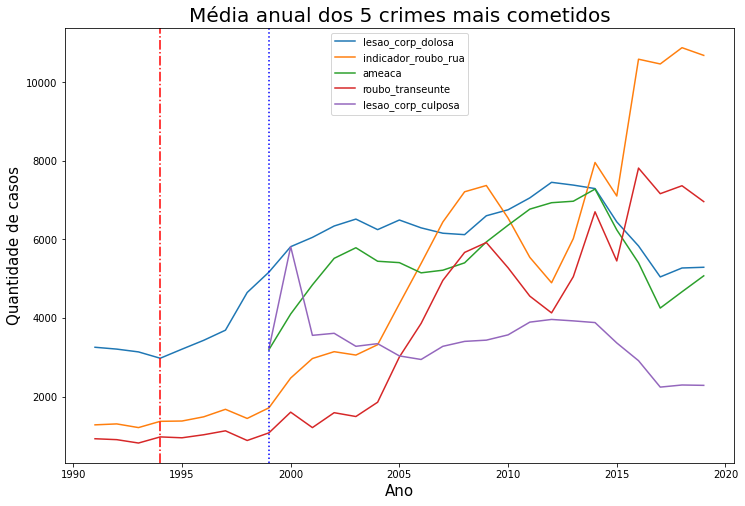

In [ ]:
plt.plot(df.groupby('vano')['lesao_corp_dolosa'].mean(), label = 'lesao_corp_dolosa')
plt.plot(df.groupby('vano')['indicador_roubo_rua'].mean(), label = 'indicador_roubo_rua')
plt.plot(df.groupby('vano')['ameaca'].mean(), label = 'ameaca')
plt.plot(df.groupby('vano')['roubo_transeunte'].mean(), label = 'roubo_transeunte')
plt.plot(df.groupby('vano')['lesao_corp_culposa'].mean(), label = 'lesao_corp_culposa')
plt.legend()
plt.title(("Média anual dos 5 crimes mais cometidos"), size = 20)
plt.xlabel(("Ano"), size = 15)
plt.ylabel(("Quantidade de casos"), size = 15)
plt.axvline(1994, color = 'r', linestyle = '-.')
plt.axvline(1999, color = 'b', linestyle = 'dotted')
pylab.rcParams['figure.figsize'] = (12.0, 8.0)

Além destes, quem mora no Rio de Janeiro sabe o quanto é comum o roubo de carro atualmente. Muitas pessoas preferem comprar carros menos visados pelos crimonosos para que não passem por uma experiência traumática ou, não tenham que repitir esta experiência.

Então, mesmo não estando entre os 5 tipos de crime mais cometidos, vamos incluí-los em nossa análise.

Podemos observar no gráfico abaixo que do ano de 1996 até 2006, delimitados pela linha vertical azul, houve um aumento considerável na ocorrência de roubo de veículose também de sua recuperação. Vale observar que os eventos de furto se mantiveram estáveis.

Já entre 2006 e 2011 houve uma queda acentuada nos roubos e uma leve queda nos furtos.

Por fim a partir de 2011 se inicia uma escalada vertiginosa de roubos até 2017, enquanto os furtos mais uma vez se mantêm estáveis.

Podemos observar também que a linha de recuperação de veículos segue o mesmo padrão da dos roubos de veículos.



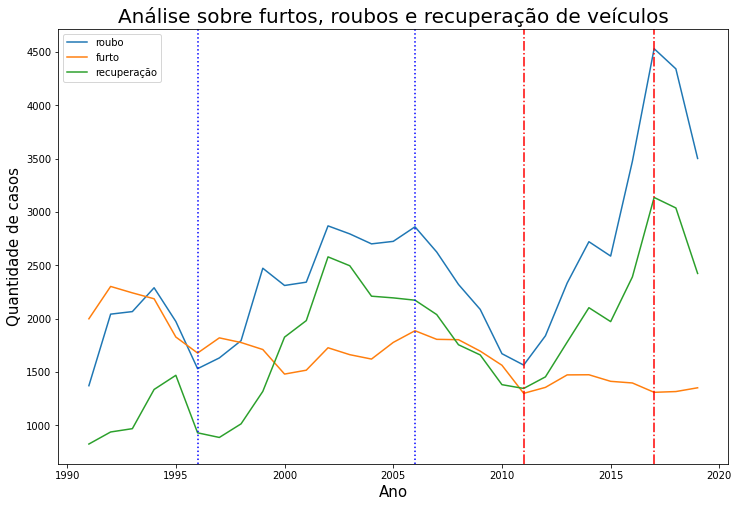

In [ ]:
plt.plot(df.groupby('vano')['roubo_veiculo'].mean(), label = 'roubo')
plt.plot(df.groupby('vano')['furto_veiculos'].mean(), label = 'furto')
plt.plot(df.groupby('vano')['recuperacao_veiculos'].mean(), label = 'recuperação')
plt.legend()
plt.title(("Análise sobre furtos, roubos e recuperação de veículos"), size = 20)
plt.xlabel(("Ano"), size = 15)
plt.ylabel(("Quantidade de casos"), size = 15)
plt.axvline(1996, color = 'b', linestyle = 'dotted')
plt.axvline(2006, color = 'b', linestyle = 'dotted')
plt.axvline(2011, color = 'r', linestyle = '-.')
plt.axvline(2017, color = 'r', linestyle = '-.');

Para compararmos todas estas variáveis, tentando achar correlações fora da obviedade, plotamos um *heatmap*.

Para esta análise em específico, iremos inserir o crime de apreensão de drogas que engloba uso/porte, tráfico e apreensão de substância entorpecente. Esta análise é interessante pois, sabemos que o RJ é dominado por diversas facções criminosas que possuem como maior fonte de recursos, o tráfico de drogas. Estas acabam sendo um item de fácil obtenção.

Como já percebemos anteriormente, dentre estas variáveis existem muitas correlações óbvias como roubo a transeunte ligado diretamente a roubo de rua e ameça com lesão corporal dolosa. Como sabemos há dolo quando há intenção, ou seja, quando o criminoso ameaça a vítima ele já tem a intenção de cometer o crime.

Acabamos por ver que  apreensão de drogas possui forte correlação com vários outros crimes analisados como lesão corporal dolosa, roubo de rua e roubo de veículo.

In [ ]:
# Criando um dataframe apenas com as variáveis que desejo analisar
df_heatmap = df[['lesao_corp_dolosa', 'indicador_roubo_rua', 'ameaca', 'roubo_transeunte', 'lesao_corp_culposa', 'roubo_veiculo', 'furto_veiculos', 'apreensao_drogas']]

display(df_heatmap)

,lesao_corp_dolosa,indicador_roubo_rua,ameaca,roubo_transeunte,lesao_corp_culposa,roubo_veiculo,furto_veiculos,apreensao_drogas
0,3051,1348,NaN,967,NaN,1174,2009,133
1,3421,1395,NaN,963,NaN,1097,1850,127
2,3613,1385,NaN,963,NaN,1265,2084,80
3,3211,1540,NaN,1186,NaN,1415,2085,133
4,3051,1266,NaN,931,NaN,1449,2185,163
...,...,...,...,...,...,...,...,...
339,5573,11040,5310.0,7031,2182.0,3755,1244,1909
340,4958,11384,5068.0,7332,2304.0,3649,1480,2034
341,4769,9551,4497.0,6077,2481.0,3115,1251,1854
342,4740,10071,4678.0,6637,2334.0,3198,1353,1861


In [ ]:
# Criando uma matriz de correlação e plotando o heatmap
corr = df_heatmap.corr()

display(corr)

,lesao_corp_dolosa,indicador_roubo_rua,ameaca,roubo_transeunte,lesao_corp_culposa,roubo_veiculo,furto_veiculos,apreensao_drogas
lesao_corp_dolosa,1.000000,0.503053,0.853048,0.531092,0.406628,0.201621,-0.586022,0.633227
indicador_roubo_rua,0.503053,1.000000,0.166162,0.981271,-0.481275,0.668151,-0.597449,0.760436
ameaca,0.853048,0.166162,1.000000,0.295703,0.230891,-0.365092,-0.137953,0.396221
roubo_transeunte,0.531092,0.981271,0.295703,1.000000,-0.374334,0.560687,-0.576619,0.752362
lesao_corp_culposa,0.406628,-0.481275,0.230891,-0.374334,1.000000,-0.592796,0.002404,-0.196445
roubo_veiculo,0.201621,0.668151,-0.365092,0.560687,-0.592796,1.000000,-0.312560,0.507446
furto_veiculos,-0.586022,-0.597449,-0.137953,-0.576619,0.002404,-0.312560,1.000000,-0.755769
apreensao_drogas,0.633227,0.760436,0.396221,0.752362,-0.196445,0.507446,-0.755769,1.000000


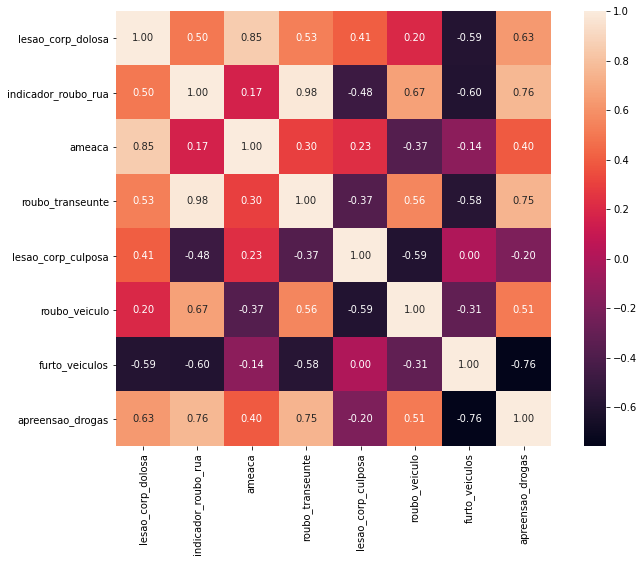

In [ ]:
sns.heatmap(corr, fmt = '.2f', square = True, linecolor = 'White', annot = True);

## Conclusão

Com este projeto podemos perceber que o RJ possui um largo portfólio de crimes cometidos e infelizmente, no geral, são crimes carregados com violência uma vez que os roubos e a forma dolosa são mais frequentes.

Isso mostra que o criminoso faz contato físico com a vítima e muitas vezes, como é de se esperar, possui a intenção de cometer os crimes, inclusive na prática de homícidios.

Há grandes oscilações ao longo dos anos em relação aos registros de crimes. Isto pode significar que há alterações periódicas em políticas públicas de segurança onde hora temos um combate intensificado e hora não, ou ainda mudanças ou demora nos registros de casos o que alteraria a data e concentração dos eventos.

Por último pudemos verificar a forte correlação e influência do tráfico de drogas nos crimes cometidos.

Uma cidade que recebe milhões de turistas por ano e oferece tantas belezas naturais e entretenimento para todos os estilos, oferece também uma cruel realidade de crime e insegurança, tendo como plano de fundo, a venda de drogas ilícitas.

Este trabalho deve ser lido como um estudo preliminar e usado para extrair *insights* de análises mais profundas.